# Chapter7 합성곱 신경망(CNN)
합성곱 신경망(Convolutional Neural Network, CNN)은 이미지 인식과 음성 인식 등 다양한 곳에서 사용된다.  
특히 이미지 인식 분야에서 딥러닝을 활용한 기법은 거의 다 CNN을 기초로 한다.  

7.1 전체 구조  
CNN에는 합성곱 계층(convolutional layer), 풀링 계층(pooling layer)가 새롭게 등장한다.  
앞서 구현한 신경망들은 인접하는 계층의 모든 뉴런과 결합되어 있었다. 이를 완전연결(fully-connected, 전결합)이라고 한다.  
Conv-ReLU-(Pooling) 흐름으로 연결된다. (풀링 계층은 생략되기도 한다.)  
지금까지 신경망에서 구현하듯이 Affine-ReLU 구성을 사용할 수 있다. 마지막 출력 계층에서는 Affine-Softmax 조합을 그대로 사용한다.  

7.2 합성곱 계층  
CNN에서는 패딩(padding), 스트라이드(stride) 등 CNN 고유의 용어가 등장한다.  
또, 각 계층 사이에는 3차원 데이터같이 입체적인 데이터가 흐른다는 점에서 완전연결 신경망과 다르다.  

7.2.1 완전연결 계층의 문제점  
완전연결 계층의 문제점: 데이터의 형상이 무시된다. ex) 데이터가 이미지면 1차원 데이터로 평탄화해서 처리한다.  
-> 모든 입력 데이터를 동등한 뉴런(같은 차원의 뉴런)으로 취급하여 형상에 담긴 정보를 살릴 수 없다.  
(공간적으로 가까운 픽셀은 값이 비슷하거나, RGB의 각 채널은 서로 밀접하게 관련되어 있거나, 거리가 먼 픽셀끼리는 별 연관이 없는 등)

합성곱 계층은 형상을 유지한다.  
CNN에서는 합성곱 계층의 입출력 데이터를 특징 맵(feature map)이라고도 한다. 합성곱 계층의 입력 데이터를 입력 특징 맵(input feature map), 출력 데이터를 출력 특징 맵(output feature map)이라고 한다.  

7.2.2 합성곱 연산  
합성곱 연산은 이미지 처리에서 필터 연산에 해당한다.  
데이터와 필터의 형상을 (높이(height), 너비(width))로 표기  
필터를 커널이라 칭하기도 한다.  
합성곱 연산은 필터의 윈도우(window)를 일정 간격으로 이동해가며 입력 데이터에 적용  
입력과 필터에서 대응하는 원소끼리 곱한 후 그 총합을 구한다.(단일 곱셈-누산(fused multiply-add, FMA)이라 한다.)

완전연결 신경망에서는 가중치 매개변수와 편향이 존재한다. CNN에서는 필터의 매개변수가 그동안의 '가중치'에 해당한다.  
편향은 필터를 적용한 후의 데이터에 더해진다. 편향은 항상 하나만 존재한다. 그 하나의 값을 필터를 적용한 모든원소에 더하는 것  

7.2.3 패딩  
패딩(padding): 합성곱 연산을 수행하기 전에 입력 데이터 주변을 특정 값으로 채우는 것  
패딩은 주로 출력 크기를 조정할 목적으로 사용  
합성곱 연산을 몇 번이나 되풀이하는 심층 신경망에서 문제가 될 수 있다. -> 크기가 점점 작아져 어느 시점에서 1이 되버림 -> 패딩 사용  

7.2.4 스트라이드
스트라이드(stride): 필터를 적용하는 위치의 간격 ex) 스트라이드를 2로하면 필터를 적용하는 윈도우가 두 칸씩 이동  

스트라이드를 키우면 출력 크기는 작아진다. 한편 패딩을 크게 하면 출력 크기가 커진다.  (수식은 책 참고)  

7.2.5 3차원 데이터의 합성곱 연산  
2차원일 때와 비교하면, 길이 방향(채널 방향)으로 특징 맵이 늘어났다. 채널 쪽으로 특징 맵이 여러 개 있다면, 입력 데이터와 필터의 합성곱 연산을 채널마다 수행하고, 그 결과를 더해서 하나의 출력을 얻는다.  
3차원의 합성곱은 입력 데이터의 채널 수와 필터의 채널 수가 같아야 한다. 한편, 필터 자체의 크기는 원하는 값으로 설정할 수 있다.(단, 모든 채널의 필터가 같은 크기여야 한다.)  

7.2.6 블록으로 생각하기  
3차원 데이터를 다차원 배열로 나타낼 떄는 (채널(channel), 높이(height), 너비(width) 순서로 쓴다. (C, H, W) 필터도 같은 순서로 쓴다.(C, FH, FW)  

합성곱 연산의 출력으로 다수의 채널을 내보내려면 어떻게 해야 할까?  
-> 필터(가중치)를 다수 사용한다.  

7.2.7 배치 처리  
각 계층을 흐르는 데이터의 차원을 하나 늘려 4차원 데이터로 저장한다. 데이터를 (데이터 수, 채널 수, 높이, 너비) 순으로 저장  
신경망에 4차원 데이터가 하나 흐를 때마다 데이터 N개에 대한 합성곱 연산이 이뤄진다.  

7.3 풀링 계층  
풀링(pooling): 세로, 가로 방향의 공간을 줄이는 연산  
최대 풀링(max pooling): 윈도우에서 최댓값을 구하는 연산    
풀링의 윈도우 크기오 스트라이드는 같은 값으로 설정하는 것이 보통

번외) 평균 풀링(average pooling)이 있다. 이미지 인식 분야에서는 주로 최대 풀링을 사용한다.  

7.3.1 풀링 계층의 특징
* 학습해야할 매개변수가 없다. -> 풀링은 대상 영역에서 최댓값이나 평균을 취하는 명확한 처리이므로 특별히 학습할 것이 없다.  
* 채널 수가 변하지 않는다. -> 채널마다 독립적으로 계산하기 때문  
* 입력의 변화에 영향을 적게 받는다. -> 입력 데이터가 조금 변해도 풀링의 결과는 잘 변하지 않는다.  

7.4 합성곱/풀링 계층 구현하기  

7.4.1 4차원 배열

In [1]:
import numpy as np
x = np.random.rand(10, 1, 28, 28) # 무작위로 데이터 생성
x.shape

(10, 1, 28, 28)

In [2]:
print(x[0].shape)
print(x[1].shape)

(1, 28, 28)
(1, 28, 28)


In [3]:
x[0, 0] # 또는 x[0][0]

array([[0.73233039, 0.99501435, 0.77746818, 0.62023231, 0.66525591,
        0.63412701, 0.95303226, 0.26018855, 0.4831213 , 0.43909244,
        0.4665478 , 0.11732176, 0.0760272 , 0.38143979, 0.37853677,
        0.24341915, 0.45145638, 0.272714  , 0.30566027, 0.0375253 ,
        0.39665656, 0.53557198, 0.52984653, 0.02878381, 0.53564892,
        0.13980036, 0.02912207, 0.55071236],
       [0.59252797, 0.82451917, 0.60266233, 0.76449308, 0.55283731,
        0.41992464, 0.18877372, 0.23960692, 0.60237394, 0.21558001,
        0.10127722, 0.02544551, 0.59154691, 0.59856095, 0.64246313,
        0.32279441, 0.80573701, 0.48706637, 0.41093993, 0.44049385,
        0.81605686, 0.02642658, 0.2882356 , 0.21032401, 0.1165467 ,
        0.01295579, 0.09512919, 0.39799929],
       [0.36722646, 0.94365911, 0.85960058, 0.30510692, 0.97522227,
        0.75549009, 0.83211334, 0.26394289, 0.0749231 , 0.27792072,
        0.74749603, 0.0136184 , 0.7423647 , 0.08916325, 0.72454541,
        0.07618776, 0.2899

7.4.2 im2col로 데이터 전개하기  
합성곱 연산을 무지성으로 만들면 for문을 겹겹이 써야한다.  
넘파이에 for문을 사용하면 성능이 떨어지는 단점이 존재  
im2col은 입력 데이터를 필터링(가중치 계산)하기 좋게 전개하는(펼치는) 함수다. ex) 3차원 입력 데이터에 im2col을 적용한면 2차원 행렬로 바뀐다.(정확히는 배치 안의 데이터 수까지 포함한 4차우너 데이터를 2차원으로 변환)  

스트라이드를 크게 잡아 필터의 적용 영역이 겹치지 않도록 했지만, 실제 상황에서는 영역이 겹치는 경우가 대부분이다.  
필터 적용 영역이 겹치게 되면 im2col로 전개한 후의 원소 수가 원래 블록의 원소 수보다 많아진다.  
-> im2col을 사용해 구현하면 메모리를 더 많이 소비한다.  
하지만, 컴퓨터는 큰 행렬을 묶어서 계산하는 데 탁월 ex) 행렬 계산 라이브러리등을 사용하면 빠르게 계산 가능  

번외) im2coldms 'image to column'의 약자다. '이미지에서 행렬로'라는 의미다.  

im2col로 입력 데이터를 전개한 다음 합성곱 계층의 필터(가중치)를 1열로 전개하고, 두 행렬의 내적을 계산한다. -> Affine 계층에서 한 것과 거의 같다.  

im2col 방식으로 출력한 결과는 2차원 행렬이다. CNN은 4차원 배열로 저장하므로 2차원인 출력 데이터를 4차원으로 변형한다.  

7.4.3 합성곱 계층 구현하기  

im2col(input_data, filter_h, filter_w, stride=1, pad=0)  
* input_data: (데이터 수, 채널 수, 높이, 너비)의 4차원 배열로 이뤄진 입력 데이터  
* filter_h: 필터의 높이  
* filter_w: 필터의 너비  
* stride: 스트라이드  
* pad: 패딩

In [2]:
import sys, os
from util import im2col

x1 = np.random.rand(1, 3, 7, 7) # (데이터 수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape) # (9, 75)

x2 = np.random.rand(10, 3, 7, 7) # 데이터 10개
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape) # (90, 75)

(9, 75)
(90, 75)


In [8]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T # 필터 전개
        out = np.dot(col, col_W) + self.b
        
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        return out
    
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx

7.4.4 풀링 계층 구현하기  
풀링 계층 구현도 합성곱 계층과 마찬가지로 im2col을 사용해 입력 데이터를 전개한다. 단, 풀링의 경우엔 채널 쪽이 독립적이라는 점이 합성곱 계층 때와 다르다.  

In [9]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)
        
        # 전개 (1)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)
        
        # 최댓값 (2)
        out = np.max(col, axis=1)
        
        # 성형 (3)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out
    
    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx

7.5 CNN 구현하기  
손글씨 숫자 인식하는 CNN 조립

Convolution - ReLU - Polling - Affine - ReLU - Affine - Softmax 순으로 흐르게 한다.

초기화 할 때 받는 인수  
* input_dim: 필터 수
* conv_param: 합성곱 계층의 하이퍼파라미터(딕셔너리).
    * filter_num: 필터 수
    * filter_size: 필터 크기
    * stride: 스트라이드
    * pad: 패딩
    * hidden_size: 은닉층(완전연결)의 뉴런 수
    * output_size: 출력층(완전연결)의 뉴런 수
    * weight_init_std: 초기화 때의 가중치 표준편차

In [14]:
class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5,
                             'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        filter_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / \
                            filter_stride +1
        pool_output_size = int(filter_num * (conv_output_size/2) *
                               (conv_output_size/2))
        
        
        # 가중치 매개변수 초기화하는 부분
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)        

        # CNN 구성하는 계층
        
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2', self.params['b2']])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.last_layer = SoftmaxWithLoss()
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)
    
    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)
        
        # 역전파
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db
        
        return grads

In [8]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.29910439661077
=== epoch:1, train acc:0.087, test acc:0.089 ===
train loss:2.2949154042212996
train loss:2.293763351708817
train loss:2.2830421955040907
train loss:2.272683998554791
train loss:2.2607556233051493
train loss:2.258591616557919
train loss:2.232407391461841
train loss:2.2054357770347535
train loss:2.1931990030004194
train loss:2.1189635749152336
train loss:2.1064439683626865
train loss:2.0658346323312515
train loss:2.065919633874741
train loss:1.9573454881329553
train loss:1.8658073080659008
train loss:1.8033430200740088
train loss:1.7250520485073446
train loss:1.7643764426780235
train loss:1.5377769848270857
train loss:1.5370258501166425
train loss:1.4022274579098084
train loss:1.226374248663039
train loss:1.3821492394942771
train loss:1.2912895877053636
train loss:1.0864571035744506
train loss:0.9784125632214062
train loss:0.9152172402851526
train loss:0.8277509791242004
train loss:0.8586330331959509
train loss:0.9266463704458555
train loss:0.9767606609109012

KeyboardInterrupt: 

7.6 CNN 시각화하기  
CNN을 구성하는 합성곱 계층은 입력으로 받은 이미지 데이터에서 '무엇을 보고 있는' 것일까?  


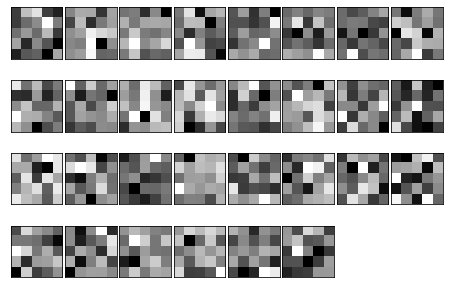

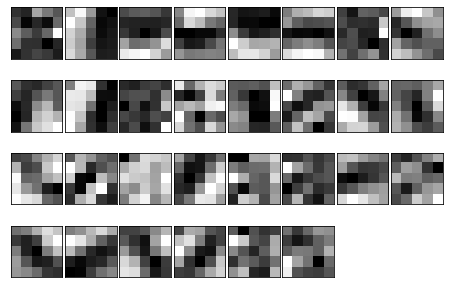

In [10]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])


1번째 층의 합성곱 계층의 가중치는 그 형상이 (30, 1, 5, 5,)였다. 필터의 크기가 5x5이고 채널이 1개라는 것은 이 필터를 1채널의 회색조 이미지로 시각화할 수 있다는 뜻이다.  
학습 전 필터는 무작위로 초기화 되어있어 흑백의 정도에 규칙이 없다.  
학습을 마친 필터는 규칙성 있는 이미지가 되었다. -> 에지(색상이 바뀐 경계선), 블롭(국소적으로 덩어리진 영역)이 보인다.  

1번째 층의 합성곱 계층에서는 에지나 블롭 등의 저수준 정보가 추출된다.  
계층이 깊어질수록 추출되는 정보(정확히는 강하게 반응하는 뉴런)는 더 추상화된다.

합성곱 계층을 여러 겹 쌓으면 층이 깊어지면서 더 복잡하고 추상화된 정보가 추출된다.  
즉, 층이 깊어지면서 뉴런이 반응하는 대상이 단순한 모양에서 '고급' 정보로 변화해간다.

7.7 대표적인 CNN
LeNet: 손글씨 숫자를 인식하는 네트워크로, 1998년에 제안되었다.  
합성곱 계층과 풀링 계층('원소를 줄이기'만 하는 서브샘플링 계층)을 반복하고 마지막으로 완전연결 계층을 거치면서 결과를 출력한다.  

LeNet과 현재의 CNN의 차이점
LeNet은 활성화 함수로 시그모이드 함수를 사용하는데 현재의 CNN은 ReLU를 사용  
LeNet은 서브샘플링을 하여 중간 데이터의 크기가 작아지지만 현재의 CNN은 최대 풀링이 주류다.(데이터 크기 안줄어든다.)  

AlexNet은 2012년에 발표된 딥러닝 네트워크로, 딥러닝 열풍을 일으키는 데 큰 역할을 했다.  
LeNet에서 큰 구조는 바뀌지 않았지만, AlexNet에서 다음과 같은 변화가 있다.  
* 활성화 함수로 ReLU 사용  
* LRN(Local Response Normalization)이라는 국소적 정규화를 실시하는 계층 이용  
* 드롭아웃 사용  

대량의 데이터를 누구나 얻을 수 있게 되었고, 병렬 계산에 특화된 GPU가 보급되면서 대량의 연산을 고속으로 수행할 수 있게 됨
-> 빅데이터, GPU가 딥러닝 발전의 큰 원동력  

7.8 정리  
* CNN은 지금까지의 완전연결 계층 네트워크에 합성곱 계층과 풀링 계층을 새로 추가한다.  
* 합성곱 계층과 풀링 계층은 im2col(이미지를 행렬로 전개하는 함수)을 이용하면 간단하고 효율적으로 구현할 수 있다.  
* CNN을 시각화해보면 계층이 깊어질수록 고급 정보가 추출되는 모습을 확인할 수 있다.  
* 대표적인 CNN에는 LeNet과 AlexNet이 있다.  
* 딥러닝의 발전에는 빅데이터와 GPU가 크게 기여했다.